## Project : Auto_MPG_Classes

* 1. Data Preprocessing
* 2. Exploratory Data Analysis
* 3. Handling Missing values and Outliers
* 4. Train_Test_split
* 5. Standardization
* 6. Build Classification Models
   * 1. DummyClassifier
   * 2. SBD Classifier
   * 3. LogisticRegression Classifier
   * 4. SVM classifier
   * 5. DecisionTree Classifier
   * 6. RandomForest Classifier
   * 7.Hard and Soft Voting
* 7.Hyper Parameter Tuning
* 8.Build Regression Models
  * 1. DecisionTree Regressor
* 9.Hyper Parameter Tuning
* 10. Select Best Model based on Train and Test Accuracy 

In [2]:
# importing necessary lib for data understanding stage

import matplotlib
import pylab as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


df=pd.read_csv("F:\\Final_project\\Auto_MPG_Class.csv")

## 1- Data Processing and Data Visualization

### Data Description

In [3]:
df1 = df.copy()
np.random.seed(42)
df1 = df1.reindex(np.random.permutation(df.index))
df1.reset_index(inplace=True, drop=True)
df1

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,MPG,Binary Classes
0,4,91.0,53.0,1795.0,17.4,76,Asia,33.0,High Level
1,4,120.0,79.0,2625.0,18.6,82,North America,28.0,High Level
2,6,232.0,100.0,2634.0,13.0,71,North America,19.0,Low Level
3,8,318.0,150.0,3940.0,13.2,76,North America,13.0,Low Level
4,8,318.0,150.0,4237.0,14.5,73,North America,14.0,Low Level
...,...,...,...,...,...,...,...,...,...
393,3,70.0,97.0,2330.0,13.5,72,Asia,19.0,Low Level
394,8,350.0,180.0,4499.0,12.5,73,North America,12.0,Low Level
395,4,134.0,95.0,2515.0,14.8,78,Asia,21.1,Low Level
396,4,89.0,62.0,2050.0,17.3,81,Asia,37.7,High Level


In [4]:
df1.shape

(398, 9)

In [5]:
df1.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,MPG
count,398.000000,387.000000,389.000000,387.000000,388.000000,398.000000,398.000000
mean,5.454774,191.484496,104.066838,2972.041344,15.582474,76.010050,23.514573
std,1.701004,102.621600,38.171488,850.363046,2.755038,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,102.500000,75.000000,2221.500000,13.875000,73.000000,17.500000
50%,4.000000,146.000000,92.000000,2807.000000,15.500000,76.000000,23.000000
75%,8.000000,260.000000,125.000000,3607.000000,17.200000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cylinders       398 non-null    int64  
 1   Displacement    387 non-null    float64
 2   Horsepower      389 non-null    float64
 3   Weight          387 non-null    float64
 4   Acceleration    388 non-null    float64
 5   Model year      398 non-null    int64  
 6   Origin          398 non-null    object 
 7   MPG             398 non-null    float64
 8   Binary Classes  398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


### Missing value imputation

In [7]:
column = list(df.columns)
print(column)
df1.isnull().sum()

['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'MPG', 'Binary Classes']


Cylinders          0
Displacement      11
Horsepower         9
Weight            11
Acceleration      10
Model year         0
Origin             0
MPG                0
Binary Classes     0
dtype: int64

In [8]:
df_im = df.copy()
select_column = column[1:5]
for i in range (len(select_column)):
    x= df[select_column[i]].median()
    df_im[select_column[i]] = df_im[select_column[i]].fillna(x)
df_im[0:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,MPG,Binary Classes
0,8,307.0,130.0,3504.0,12.0,70,North America,18.0,Low Level
1,8,350.0,165.0,3693.0,11.5,70,North America,15.0,Low Level
2,8,318.0,150.0,3436.0,11.0,70,North America,18.0,Low Level
3,8,304.0,150.0,3433.0,12.0,70,North America,16.0,Low Level
4,8,302.0,140.0,3449.0,15.5,70,North America,17.0,Low Level
5,8,429.0,198.0,4341.0,10.0,70,North America,15.0,Low Level
6,8,454.0,220.0,4354.0,9.0,70,North America,14.0,Low Level
7,8,440.0,92.0,4312.0,8.5,70,North America,14.0,Low Level
8,8,455.0,225.0,4425.0,10.0,70,North America,14.0,Low Level
9,8,146.0,190.0,3850.0,8.5,70,North America,15.0,Low Level


In [9]:
df_im.isnull().sum()

Cylinders         0
Displacement      0
Horsepower        0
Weight            0
Acceleration      0
Model year        0
Origin            0
MPG               0
Binary Classes    0
dtype: int64

## Data Exploration

<b><font size = "4">Univariate Analysis</font></b>

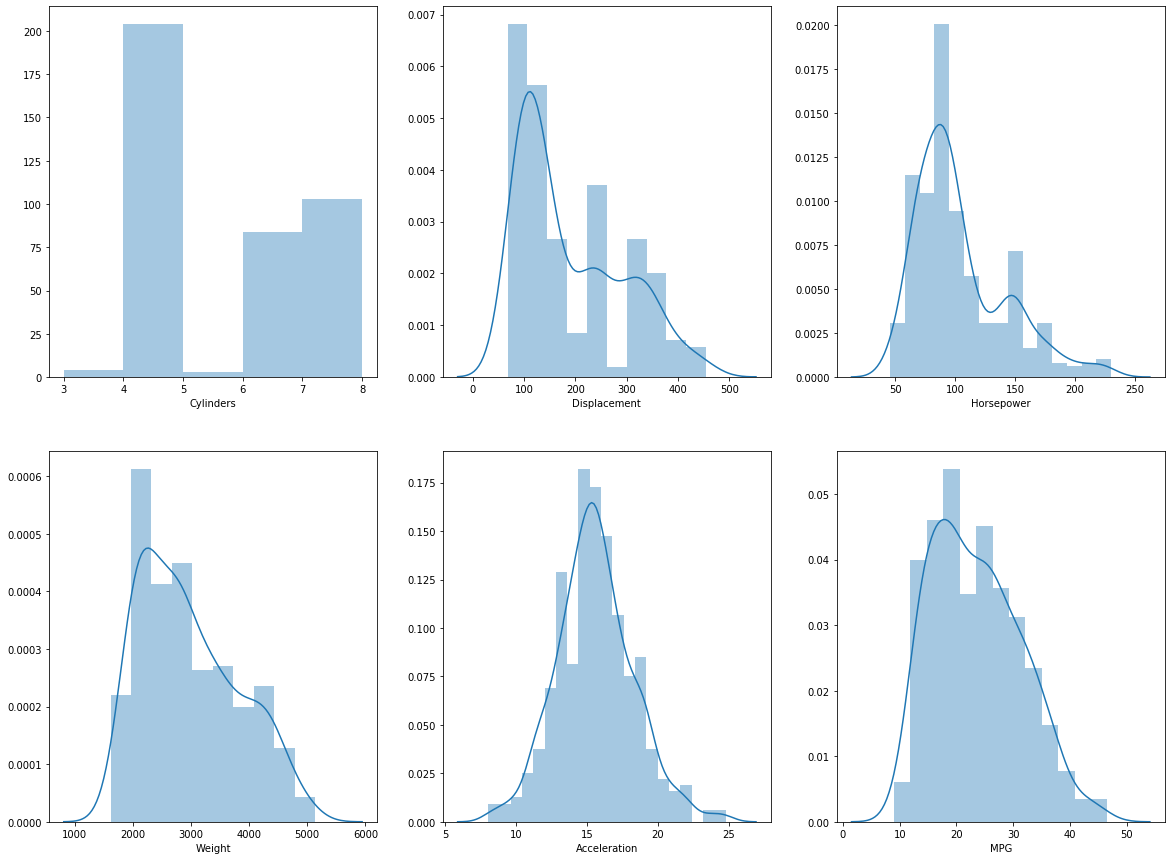

In [10]:
#Lets plot univariate distribution of all the numeric variables
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
sns.distplot(df_im['Cylinders'], kde=False,ax=axes[0,0])
sns.distplot(df_im['Displacement'], kde=True,ax=axes[0,1])
sns.distplot(df_im['Horsepower'], kde=True,ax=axes[0,2])
sns.distplot(df_im['Weight'], kde=True,ax=axes[1,0])
sns.distplot(df_im['Acceleration'], kde=True,ax=axes[1,1])
sns.distplot(df_im['MPG'], kde=True,ax=axes[1,2])

In [11]:
print(df_im['Origin'].value_counts(),"\n")
print(df_im['Binary Classes'].value_counts(),"\n")

North America    249
Asia              79
Europe            70
Name: Origin, dtype: int64 

Low Level     207
High Level    191
Name: Binary Classes, dtype: int64 



(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

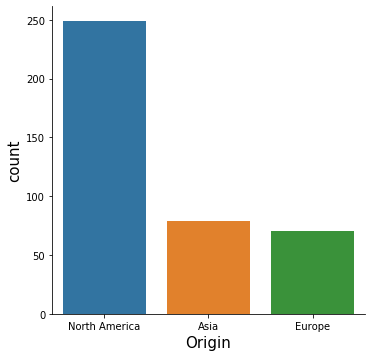

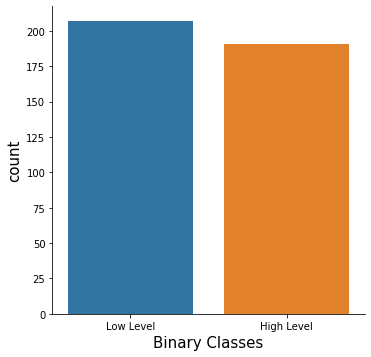

In [12]:
sns.catplot(data=df_im, x='Origin',kind="count")
plt.xlabel("Origin",fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.catplot(data=df_im, x='Binary Classes',kind="count")
plt.xlabel("Binary Classes",fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

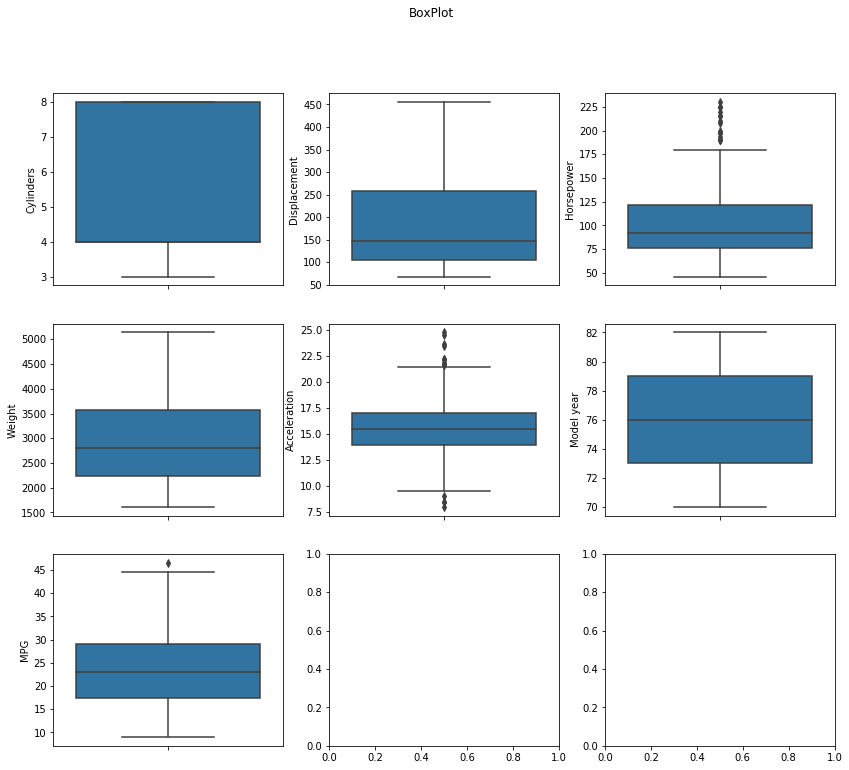

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))

fig.suptitle('BoxPlot')


sns.boxplot(ax=axes[0, 0], data=df_im, y='Cylinders')
sns.boxplot(ax=axes[0, 1], data=df_im, y='Displacement')
sns.boxplot(ax=axes[0, 2], data=df_im, y='Horsepower')
sns.boxplot(ax=axes[1, 0], data=df_im, y='Weight')
sns.boxplot(ax=axes[1, 1], data=df_im, y='Acceleration')
sns.boxplot(ax=axes[1, 2], data=df_im, y='Model year')
sns.boxplot(ax=axes[2, 0], data=df_im, y='MPG')


In [14]:
df_im['Binary Classes'].unique()

array(['Low Level', 'High Level'], dtype=object)

<b><font size = "4">Bivariate Analysis</font></b>

In [15]:
print('1)Total:',df_im['Origin'].count(),'\n',df_im['Origin'].value_counts(),'\n')
table = pd.crosstab(df_im['Binary Classes'],columns= df_im.Origin)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 398 
 North America    249
Asia              79
Europe            70
Name: Origin, dtype: int64 

2)table of joint proportion
 Origin          Asia  Europe  North America
Binary Classes                             
High Level        69      53             69
Low Level         10      17            180 

3)conditional probability conditioned on columns 
 Origin              Asia    Europe  North America
Binary Classes                                   
High Level      0.873418  0.757143       0.277108
Low Level       0.126582  0.242857       0.722892 

4)conditional probability conditioned on rows 
 Origin              Asia    Europe  North America
Binary Classes                                   
High Level      0.361257  0.277487       0.361257
Low Level       0.048309  0.082126       0.869565


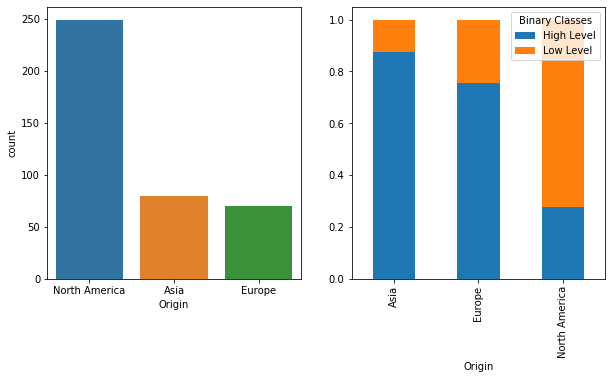

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('Origin',data=df_im,ax=ax1)
ct=pd.crosstab(df_im['Origin'],df_im['Binary Classes'], normalize='index')
ct.plot.bar(stacked=True,ax= ax2)

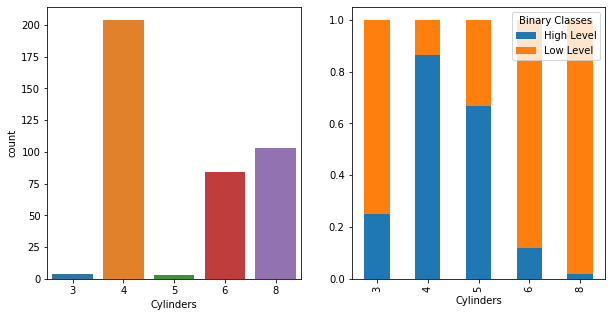

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot('Cylinders',data=df_im,ax=ax1)
ct=pd.crosstab(df_im['Cylinders'],df_im['Binary Classes'], normalize='index')
ct.plot.bar(stacked=True,ax= ax2)

### Lets find Correlation amoung the variables !!

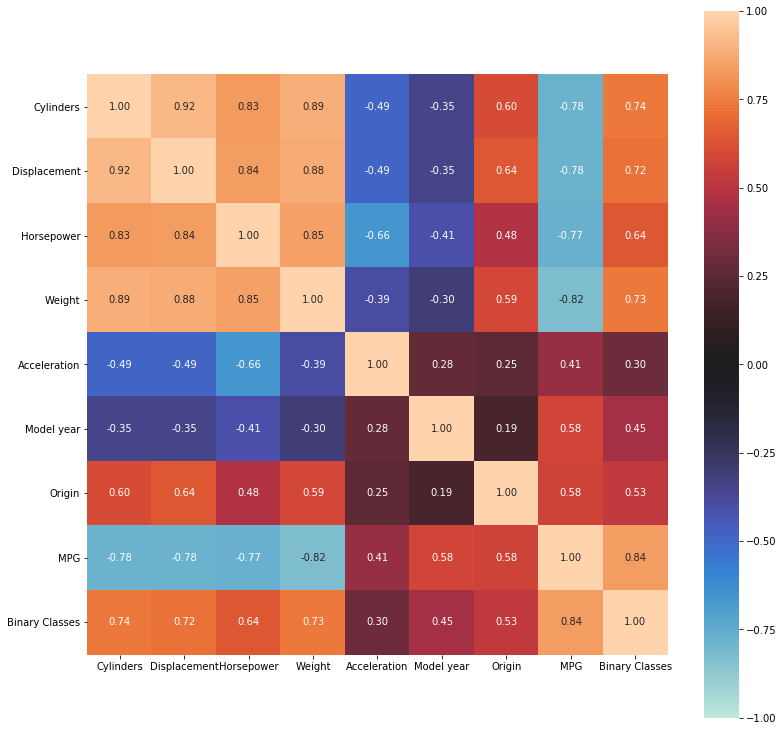

{'corr':                 Cylinders  Displacement  Horsepower    Weight  Acceleration  \
 Cylinders        1.000000      0.921426    0.833614  0.885094     -0.489056   
 Displacement     0.921426      1.000000    0.836048  0.881379     -0.491769   
 Horsepower       0.833614      0.836048    1.000000  0.850951     -0.660924   
 Weight           0.885094      0.881379    0.850951  1.000000     -0.394872   
 Acceleration    -0.489056     -0.491769   -0.660924 -0.394872      1.000000   
 Model year      -0.348746     -0.345305   -0.409105 -0.304950      0.277801   
 Origin           0.604435      0.641164    0.481148  0.590666      0.250076   
 MPG             -0.775396     -0.779852   -0.770774 -0.823303      0.407154   
 Binary Classes   0.736711      0.720846    0.640805  0.734687      0.303491   
 
                 Model year    Origin       MPG  Binary Classes  
 Cylinders        -0.348746  0.604435 -0.775396        0.736711  
 Displacement     -0.345305  0.641164 -0.779852        0.7

In [18]:
from dython import nominal
nominal.associations(df_im[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'MPG', 'Binary Classes']],figsize=(13,13))

In [19]:
df_im['Origin']=df_im['Origin'].replace('Asia', 0) #Replace Asia with 0
df_im['Origin']=df_im['Origin'].replace('North America',1 )#Replace North America with 1
df_im['Origin']=df_im['Origin'].replace('Europe',2 )# Replace Europe with 2
df_im
corr_matrix= df_im.corr()
corr_matrix
corr_matrix["MPG"].sort_values(ascending=False)
def corr_bar(df):
#"""Plot correlation bar with the pair of atrribute with lastcolumn"""
    corr=df_im.corr()
    Colms_sh=list(list(corr.columns))
    coefs=corr.values[:,-1][:-1]
    names=Colms_sh[:-1]
    r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0 },
    index = names )
    r_ = r_.sort_values(by=['coef'])
    r_['coef'].plot(kind='barh', color=r_['positive'].map({True:
    'b', False: 'r'}))
    plt.xlabel('Correlation Coefficient',fontsize=6)
    plt.vlines(x=0,ymin=-0.5, ymax=10, color = 'k',linewidth=0.8,
    linestyle="dashed")
    plt.show()

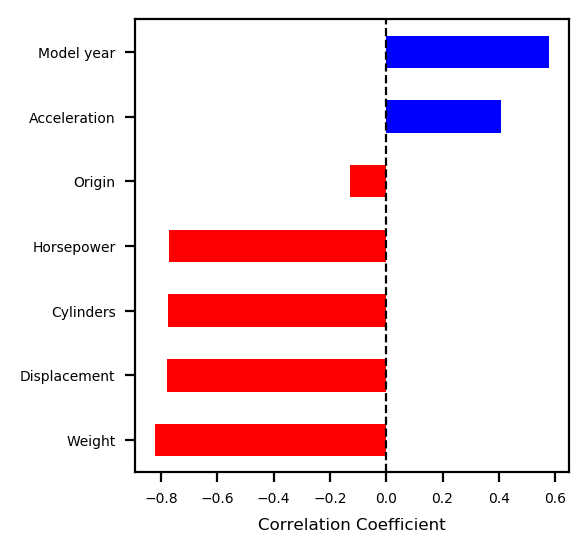

In [20]:
font = {'size' : 5}
matplotlib.rc('font', **font)
ax1 = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')
# Plot correlations of attributes with the last column
corr_bar(df_im)

### Outlier Detection and Removal

In [21]:
n=2.5
mean = df_im['Acceleration'].mean()
sd=df_im['Acceleration'].std()
drop_r = df_im.index[(mean -n * sd> df_im['Acceleration']) | (mean +n * sd< df_im['Acceleration'])]
df_im.drop(drop_r , axis=0 , inplace= True)
len(df_im['Binary Classes'])

391

In [22]:
n=2.5
mean = df_im['Horsepower'].mean()
sd=df_im['Horsepower'].std()
drop_r = df_im.index[(mean -n * sd> df_im['Horsepower']) | (mean +n * sd< df_im['Horsepower'])]
df_im.drop(drop_r , axis=0 , inplace= True)
len(df_im['Binary Classes'])

379

In [23]:
df_im.shape

(379, 9)

In [24]:
# verify using IQR 

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_o1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_o1.shape)

Cylinders          4.000
Displacement     157.500
Horsepower        50.000
Weight          1385.500
Acceleration       3.325
Model year         6.000
MPG               11.500
dtype: float64
(379, 9)


In [25]:
data_o1 # cleaned data set

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,MPG,Binary Classes
0,4,91.0,53.0,1795.0,17.4,76,Asia,33.0,High Level
1,4,120.0,79.0,2625.0,18.6,82,North America,28.0,High Level
2,6,232.0,100.0,2634.0,13.0,71,North America,19.0,Low Level
3,8,318.0,150.0,3940.0,13.2,76,North America,13.0,Low Level
4,8,318.0,150.0,4237.0,14.5,73,North America,14.0,Low Level
...,...,...,...,...,...,...,...,...,...
393,3,70.0,97.0,2330.0,13.5,72,Asia,19.0,Low Level
394,8,350.0,180.0,4499.0,12.5,73,North America,12.0,Low Level
395,4,134.0,95.0,2515.0,14.8,78,Asia,21.1,Low Level
396,4,89.0,62.0,2050.0,17.3,81,Asia,37.7,High Level


### Hot Encoding & Standardization

In [26]:
One_hot = pd.get_dummies(df_im['Origin'] , prefix = 'Origin')
df_one_hot = pd.concat([df_im,One_hot] , axis=1)
#df_one_hot.drop(['Origin'] , axis=1 , inplace =True)
df_one_hot

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,MPG,Binary Classes,Origin_0,Origin_1,Origin_2
0,8,307.0,130.0,3504.0,12.0,70,1,18.0,Low Level,0,1,0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0,Low Level,0,1,0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0,Low Level,0,1,0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0,Low Level,0,1,0
4,8,302.0,140.0,3449.0,15.5,70,1,17.0,Low Level,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,4,151.0,90.0,2950.0,17.3,82,1,27.0,High Level,0,1,0
393,4,140.0,86.0,2790.0,15.6,82,1,27.0,High Level,0,1,0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0,High Level,0,1,0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0,High Level,0,1,0


### Creating Training,Test and Validation data

In [203]:
dfbinary = df_one_hot.copy()
dfbinary['Binary Classes'] = dfbinary['Binary Classes'].replace('Low Level', 0)
dfbinary['Binary Classes'] = dfbinary['Binary Classes'].replace('High Level', 1)


In [204]:
# step 1: split the data into train and split
X = dfbinary.drop(['Binary Classes','Origin','MPG'], axis=1)

y =  dfbinary.drop(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year','Origin','MPG','Origin_0','Origin_1','Origin_2'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0,stratify=y,test_size=0.2)

# step 2: split the train data now into train validation and cross validation
#train_df1,cv_df,y_train1,y_cv=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)

In [29]:
print("Total Number of data points: ",dfbinary.shape[0])
print("Number of data points in train data:",X_train.shape[0])
print("Number of data points in test data:",X_test.shape[0])
#print("Number of data points in validation data:",cv_df.shape[0])

Total Number of data points:  379
Number of data points in train data: 303
Number of data points in test data: 76


### Standardization 

In [30]:
from sklearn.impute import SimpleImputer
imput_mdn1 = SimpleImputer(strategy='median')
imput_mdn1.fit(X_train)

SimpleImputer(strategy='median')

In [31]:
im_train = imput_mdn1.transform(X_train)
dfimput_train=pd.DataFrame(im_train, columns=X_train.columns)
dfimput_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin_0,Origin_1,Origin_2
0,4.0,151.0,92.0,3035.0,20.5,82.0,0.0,1.0,0.0
1,4.0,121.0,115.0,2795.0,15.7,78.0,0.0,0.0,1.0
2,6.0,232.0,90.0,3211.0,17.0,75.0,0.0,1.0,0.0
3,4.0,98.0,80.0,1915.0,14.4,79.0,0.0,1.0,0.0
4,6.0,198.0,95.0,2904.0,16.0,73.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
298,6.0,250.0,110.0,2807.0,16.2,76.0,0.0,1.0,0.0
299,4.0,90.0,70.0,1937.0,14.0,75.0,0.0,0.0,1.0
300,4.0,122.0,86.0,2220.0,14.0,71.0,0.0,1.0,0.0
301,4.0,105.0,74.0,2190.0,14.2,81.0,0.0,0.0,1.0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfscale_train = scaler.fit_transform(dfimput_train)
dfscale_train.shape

(303, 9)

In [76]:
final_data=dfscale_train

In [77]:
final_data.shape

(303, 9)

In [208]:
ytrain = y_train['Binary Classes'].values
ytrain.shape

(303,)

In [209]:
from sklearn.impute import SimpleImputer
imput_mdn1_test = SimpleImputer(strategy='median')
imput_mdn1_test.fit(X_test)
im_Xtest = imput_mdn1_test.transform(X_test)
dfimput_Xtest=pd.DataFrame(im_Xtest, columns=X_test.columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfscale_test = scaler.fit_transform(dfimput_Xtest)
dfscale_test.shape
final_Xtest=dfscale_test.copy()
final_Xtest.shape

(76, 9)

In [210]:
ytest=y_test['Binary Classes'].values
ytest.shape

(76,)

In [37]:
#One_hot = pd.get_dummies(df_im['Origin'] , prefix = 'Origin')
#df_one_hot = pd.concat([df_im,One_hot] , axis=1)
#df_one_hot.drop(['Origin'] , axis=1 , inplace =True)



#imput_mdn1 = SimpleImputer(strategy='median')
#dfimput1 = df_one_hot.drop(['Cylinders','Binary Classes','MPG'],axis =1)
#imput_mdn1.fit(dfimput1)
#imput_mdn1.statistics_

In [38]:
#im = imput_mdn1.transform(dfimput1)
#dfimput2=pd.DataFrame(im, columns=dfimput1.columns)
#dfimput2.head()

In [39]:
#scaler = StandardScaler()
#dfscale = scaler.fit_transform(dfimput2)
#dfscale

In [40]:
#cat_encoder = OneHotEncoder()
#dfonehot=cat_encoder.fit_transform(data_o1[['Origin']])
#dfonehot=dfonehot.toarray()
#dfonehot

Split After standardization

In [41]:
# step 1: split the data into train and split
#X1 = df_one_hot.drop(['Binary Classes'], axis=1)

#y1 =  df_one_hot.drop(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year','Displacement','Horsepower','Weight','Acceleration','Model year','Origin_0','Origin_1','Origin_2','MPG'], axis=1)
#X_train1,test_df1,y_train1,y_test1=train_test_split(X1,y1, random_state=0,stratify=y1,test_size=0.2)

# step 2: split the train data now into train validation and cross validation
#train_df1,cv_df1,y_train1,y_cv1=train_test_split(X_train1,y_train1,stratify=y_train1,test_size=0.2)

In [42]:
#print("Total Number of data points: ",df_one_hot.shape[0])
#print("Number of data points in train data:",X_train1.shape[0])
#print("Number of data points in test data:",test_df1.shape[0])
#print("Number of data points in train data:",cv_df1.shape[0])

In [43]:
#from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
#dfonehot=X_train[['Origin_0','Origin_1','Origin_2']]
#dfonehot=np.array(dfonehot)
#dfonehot.shape

In [44]:
#dfconcat=np.concatenate((dfscale_train,dfcylinder),axis=1)
#xconcat=dfconcat

## 2.Binary Classifications

### Dummy Classifier

In [79]:
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier

# Apply a random classifier
dmy_clsf = DummyClassifier(random_state=42)
dmy_clsf.fit(final_data,ytrain)
Accuracy1=cross_val_score(dmy_clsf,final_data,ytrain, cv=5, scoring="accuracy")
np.mean(Accuracy1)

0.49836065573770494

In [80]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred_ = cross_val_predict(dmy_clsf,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_)

array([[82, 71],
       [81, 69]], dtype=int64)

In [81]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(ytrain, y_train_pred_) 
print('Precision= ',precision)
recall=recall_score(ytrain, y_train_pred_) 
print('Recall (sensitivity)= ',recall)

Precision=  0.4928571428571429
Recall (sensitivity)=  0.46


In [107]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
estimatorDummyClassifier = DummyClassifier()
paramslinear = {'strategy':["stratified","most_frequent","prior","uniform" ,"constant",'warn']}
result4 = RandomizedSearchCV(estimatorDummyClassifier, paramslinear, cv=5, scoring='accuracy')
result4.fit(final_data, ytrain)
print("Best params_: ",result4.best_params_)
print("Best_score: ",result4.best_score_)


Best params_:  {'strategy': 'stratified'}
Best_score:  0.5277595628415301


In [110]:
# Call Dummy classifier
Dummy_clsf_finetune = DummyClassifier(strategy='stratified',random_state=42)
# Train Dummy classifier
Dummy_clsf_finetune.fit(final_data, ytrain)

DummyClassifier(random_state=42, strategy='stratified')

In [296]:
from sklearn.model_selection import cross_val_score
Tuned_Accuracy3=cross_val_score(Dummy_clsf_finetune,final_data, ytrain,cv=5, scoring="accuracy")
Dummy_Accuracy=Tuned_Accuracy3
print(Tuned_Accuracy3)
print("Dummy Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(Tuned_Accuracy3),3))
Dummy_Accuracy1=round(np.mean(Tuned_Accuracy3),3)

[0.47540984 0.54098361 0.47540984 0.53333333 0.46666667]
Dummy Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.498


#### Accuracy of Dummy Classifier model After Fine tune remains same  50%

### Stochastic Gradient Descent.

In [112]:
from sklearn.linear_model import SGDClassifier
# Call SGD classifier
sgd_clsf = SGDClassifier(random_state=42)
# Train SGD classifier
sgd_clsf.fit(final_data, ytrain)

SGDClassifier(random_state=42)

In [113]:
from sklearn.model_selection import cross_val_score
Accuracy2=cross_val_score(sgd_clsf,final_data, ytrain,cv=5, scoring="accuracy")
round(np.mean(Accuracy2),3)

0.878

The accuracy is fairly high and indicates the ration of correct Predictions

By applying ML we managed to improve the AVG accuracy 50 % for a dummy classifier to 96 % AVG accuracy in a SGD model by 46%

In [114]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clsf,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred)

array([[133,  20],
       [ 17, 133]], dtype=int64)

In [115]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(ytrain, y_train_pred) 
print('Precision= ',precision)
recall=recall_score(ytrain, y_train_pred) 
print('Recall (sensitivity)= ',recall)

Precision=  0.869281045751634
Recall (sensitivity)=  0.8866666666666667


In [116]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
estimatorSGDClassifier = SGDClassifier()
paramslinear = {'penalty':['l2', 'l1', 'elasticnet'],'loss': ['hinge','squared_hinge','log', 'modified_huber'],'eta0' : ['double',0.0],'early_stopping':[True,False]}
result1 = RandomizedSearchCV(estimatorSGDClassifier, paramslinear, cv=5, scoring='accuracy')
result1.fit(final_data, ytrain)
print("Best params_: ",result1.best_params_)
print("Best_score: ",result4.best_score_)

Best params_:  {'penalty': 'l2', 'loss': 'hinge', 'eta0': 0.0, 'early_stopping': True}
Best_score:  0.5277595628415301


In [344]:
from sklearn.linear_model import SGDClassifier
# Call SGD classifier
sgd_clsf_finetune = SGDClassifier(penalty='l1', loss='log', eta0= 0.0, early_stopping= False)
# Train SGD classifier
sgd_clsf_finetune.fit(final_data, ytrain)
from sklearn.model_selection import cross_val_score
sgd_Accuracy=cross_val_score(sgd_clsf_finetune,final_data, ytrain,cv=5, scoring="accuracy")
print(sgd_Accuracy)
print("SGD Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(sgd_Accuracy),3))
SGD_Accuracy1=round(np.mean(sgd_Accuracy),3)

[0.93442623 0.75409836 0.83606557 0.91666667 0.85      ]
SGD Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.858


In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred_sgd = cross_val_predict(sgd_clsf_finetune,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_sgd)

array([[135,  18],
       [ 21, 129]], dtype=int64)

### Accuracy of SGD Classifier model After Fine tune improved from 87 % to 88% by 1%

## 3.  Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
# Call LR classifier
LR_clsf = LogisticRegression(random_state=42)
# Train LR classifier
LR_clsf.fit(final_data, ytrain)

LogisticRegression(random_state=42)

In [93]:
from sklearn.model_selection import cross_val_score
LRAccuracy=cross_val_score(LR_clsf,final_data, ytrain,cv=5, scoring="accuracy")
LRAccuracy

array([0.95081967, 0.85245902, 0.83606557, 0.88333333, 0.86666667])

In [94]:
round(np.mean(LRAccuracy),3)

0.878

In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred_LR = cross_val_predict(LR_clsf,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_LR)

array([[131,  22],
       [ 15, 135]], dtype=int64)

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
estimatorLR = LogisticRegression()
paramslinear = {'penalty':['l2', 'l1', 'elasticnet','none'],'max_iter':list(range(10,101,10)),'C':np.logspace(-4,4,20)}
result4 = RandomizedSearchCV(estimatorLR, paramslinear, cv=5, scoring='accuracy')
result4.fit(final_data, ytrain)
print("Best params_: ",result4.best_params_)
print("Best_score: ",result4.best_score_)

Best params_:  {'penalty': 'l2', 'max_iter': 50, 'C': 4.281332398719396}
Best_score:  0.8845901639344262


In [297]:
from sklearn.linear_model import LogisticRegression
# Call LR classifier
LR_clsf_finetune = LogisticRegression(penalty='none', max_iter=70,C=545.559,random_state=42)
# Train LR classifier
LR_clsf_finetune.fit(final_data, ytrain)
from sklearn.model_selection import cross_val_score
LR_Accuracy=cross_val_score(LR_clsf_finetune,final_data, ytrain, cv=5, scoring="accuracy")
print(LR_Accuracy)
print("LR Classifier Accuracy(mean of 5 accuracy) After Fine :",round(np.mean(LR_Accuracy),3))
LogisticReg_Accuracy1=round(np.mean(LR_Accuracy),3)

[0.91803279 0.83606557 0.85245902 0.91666667 0.88333333]
LR Classifier Accuracy(mean of 5 accuracy) After Fine : 0.881


In [98]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred_LR_ = cross_val_predict(LR_clsf_finetune,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_LR_)

array([[133,  20],
       [ 16, 134]], dtype=int64)

### Accuracy of LogisticRegression Classifier model After Fine tune improves by 1 %  , i,e from 87% to 88%

### 4. Support Vector Machine:Linear

In [99]:
from sklearn.svm import LinearSVC
np.random.seed(42)
linearsvmclf = LinearSVC(C=1,loss='squared_hinge')
linearsvmclf.fit(final_data, ytrain)

LinearSVC(C=1)

In [123]:
from sklearn.model_selection import cross_val_score
SVM_Accuracies = cross_val_score(linearsvmclf, final_data, ytrain, cv=5, scoring='accuracy')
print("SVM Classifier Accuracy(mean of 5 accuracy):",round(np.mean(SVM_Accuracies),3))
y_train_pred_LR = cross_val_predict(linearsvmclf,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_LR)

SVM Classifier Accuracy(mean of 5 accuracy): 0.885


array([[133,  20],
       [ 15, 135]], dtype=int64)

In [101]:
from sklearn.svm import SVC
np.random.seed(42)
estimatorsvc = LinearSVC()
paramssvc = {'C':list(np.logspace(-4,4,20)),'loss' : ['hinge', 'squared_hinge']}
searchsvc = RandomizedSearchCV(estimatorsvc, paramssvc, cv=5, scoring = 'accuracy')
searchsvc.fit(final_data, ytrain)
print(searchsvc.best_params_)
print("Best_score: ",searchsvc.best_score_)

{'loss': 'hinge', 'C': 0.03359818286283781}
Best_score:  0.9008196721311474


In [298]:
np.random.seed(42)
linearsvmclf_fine_tuned = LinearSVC(C=0.0335,loss='hinge')
linearsvmclf_fine_tuned.fit(final_data, ytrain)
SVM_tuned_Accuracy=cross_val_score(linearsvmclf_fine_tuned,final_data, ytrain, cv=5, scoring="accuracy")
print(SVM_tuned_Accuracy)
print("SVM Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(SVM_tuned_Accuracy),3))
SVMLinear_Accuracy1=round(np.mean(SVM_tuned_Accuracy),3)

[0.95081967 0.90163934 0.90163934 0.9        0.85      ]
SVM Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.901


### Accuracy of LinearSVM Classifier model After Fine tune improves by 2 %  , i,e from 88% to 90%

### 5. Support Vector Machine: Polynomial Kernel

In [103]:
np.random.seed(42)
Polysvc=SVC(kernel='poly', C = 40, coef0 = 1.788888888888889, degree = 3)
Polysvc.fit(final_data,ytrain)
PolySVMccuracy=cross_val_score(Polysvc,final_data, ytrain,cv=5, scoring="accuracy")
print("Polynomial Kernel SVM :",np.mean(PolySVMccuracy))
y_train_pred_PolySVM = cross_val_predict(Polysvc,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_PolySVM)

Polynomial Kernel SVM : 0.8647540983606558


array([[135,  18],
       [ 23, 127]], dtype=int64)

In [104]:
from sklearn.svm import SVC
np.random.seed(42)
estimatorPsvc = SVC(kernel='poly')
paramsPsvc = {'C': [1,20,40,60,80,100], 'degree': [1,2,3,4,5,6,7,8,9,10],'coef0': list(np.linspace(0.1,2,10))}
searchPsvc = RandomizedSearchCV(estimatorPsvc, paramsPsvc, cv=5, scoring = 'accuracy')
searchPsvc.fit(final_data, ytrain)
print(searchPsvc.best_params_)
print("Best_score: ",searchPsvc.best_score_)

{'degree': 1, 'coef0': 0.3111111111111111, 'C': 1}
Best_score:  0.8942622950819672


In [301]:
np.random.seed(42)
Polysvc_Tuned=SVC(kernel='poly', C = 1, coef0 =0.311, degree = 1)
Polysvc_Tuned.fit(final_data,ytrain)
PolySVMccuracy_tuned=cross_val_score(Polysvc_Tuned,final_data, ytrain,cv=5, scoring="accuracy")
print("Polynomial Kernel SVM after Fine tune :",np.mean(PolySVMccuracy_tuned))
y_train_pred_PolySVM_ = cross_val_predict(Polysvc_Tuned,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_PolySVM_)
SVMPoly_Accuracy1=round(np.mean(PolySVMccuracy_tuned),3)

Polynomial Kernel SVM after Fine tune : 0.8942622950819672


### Accuracy of SVM:Polynomial Classifier model After Fine tune improves by 3 %  , i,e from 86% to 89%

## 6.Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_ = RandomForestClassifier(random_state=42)
RandomForest_.fit(final_data, ytrain)

RandomForestClassifier(random_state=42)

In [336]:
from sklearn.model_selection import cross_val_score
RF_Accuracies = cross_val_score(RandomForest_, final_data, ytrain, cv=5, scoring='accuracy')
print("RF Classifier Accuracy(mean of 5 accuracy):",round(np.mean(RF_Accuracies),3))
y_train_pred_RF = cross_val_predict(RandomForest_,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_RF)

RF Classifier Accuracy(mean of 5 accuracy): 0.914


array([[138,  15],
       [ 11, 139]], dtype=int64)

In [126]:
np.random.seed(42)
estimatorRF = RandomForestClassifier()
paramsRF = {'n_estimators': list(range(1,10,1)), 'max_depth': [None,1,2,3,4,5,6,7,8,9,10],'min_samples_split': list(range(1,10,1)),'bootstrap':[True,False]}
searchRF = RandomizedSearchCV(estimatorRF, paramsRF, cv=5, scoring = 'accuracy')
searchRF.fit(final_data, ytrain)
print(searchRF.best_params_)
print("Best_score: ",searchRF.best_score_)

{'n_estimators': 6, 'min_samples_split': 3, 'max_depth': 10, 'bootstrap': False}
Best_score:  0.9208196721311476


In [128]:
RandomForest_Tuned = RandomForestClassifier(n_estimators=6,min_samples_split=3,max_depth=10,bootstrap=False,random_state=42)
RandomForest_Tuned.fit(final_data, ytrain)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=3,
                       n_estimators=6, random_state=42)

In [302]:
from sklearn.model_selection import cross_val_score
RF_Accuracies_Tuned = cross_val_score(RandomForest_Tuned, final_data, ytrain, cv=5, scoring='accuracy')
RF_Accuracies__=round(np.mean(RF_Accuracies_Tuned),3)
print("Random Forest Classifier Accuracy(mean of 5 accuracy) After Fine Tune:",RF_Accuracies__)
y_train_pred_RF_ = cross_val_predict(RandomForest_Tuned,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_RF_)
RF_Accuracy1=round(np.mean(RF_Accuracies_Tuned),3)

Random Forest Classifier Accuracy(mean of 5 accuracy) After Fine Tune: 0.918


### Accuracy of Random Forest Classifier model After Fine tune no such improvements 91%

## 8. Decision Tree Classifier

In [176]:
dfbinary_1=dfbinary.copy() # lets replace our target variable with categorical values
dfbinary_1['Binary Classes'] = dfbinary_1['Binary Classes'].replace(0,'Low Level')
dfbinary_1['Binary Classes'] = dfbinary_1['Binary Classes'].replace(1,'High Level')

In [164]:
X = dfbinary_1.drop(['Binary Classes','Origin','MPG'], axis=1)

y =  dfbinary_1.drop(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year','Origin','MPG','Origin_0','Origin_1','Origin_2'], axis=1)
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y, random_state=0,stratify=y,test_size=0.2)

In [353]:
from sklearn.impute import SimpleImputer
imput_mdn2 = SimpleImputer(strategy='median')
imput_mdn2.fit(X_train1)
from sklearn.impute import SimpleImputer
imput_mdn3 = SimpleImputer(strategy='median')
imput_mdn3.fit(X_test1)

SimpleImputer(strategy='median')

In [359]:
# Split X_train & y_train for traing the Decision model
im_train1 = imput_mdn2.transform(X_train1)
dfimput_train1=pd.DataFrame(im_train1, columns=X_train1.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfscale_train1 = scaler.fit_transform(dfimput_train1)
print(dfscale_train1.shape)
DT_Xtrain=dfscale_train1.copy()
ytrain1 = y_train1['Binary Classes'].values

# Split X_test & ytest for testing the Decision model

im_test3 = imput_mdn3.transform(X_test1)
dfimput_test3=pd.DataFrame(im_test3, columns=X_test1.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfscale_test3 = scaler.fit_transform(dfimput_test3)
print(dfscale_test3.shape)
DT_Xtest=dfscale_test3.copy()
ytest1_ = y_test1['Binary Classes'].values

(303, 9)
(76, 9)


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DTree1 = DecisionTreeClassifier(criterion='gini',random_state=42)
DTree1.fit(DT_Xtrain, ytrain1)

DecisionTreeClassifier(random_state=42)

In [172]:
DT_Accuracies1 = cross_val_score(DTree1, DT_Xtrain, ytrain, cv=5, scoring='accuracy')
print("Decision Tree Classifier Accuracy(mean of 5 accuracy):",round(np.mean(DT_Accuracies1),3))
y_train_pred_DT1 = cross_val_predict(DTree1,DT_Xtrain,ytrain1, cv=5)
confusion_matrix(ytrain1, y_train_pred_DT1)

Decision Tree Classifier Accuracy(mean of 5 accuracy): 0.858


array([[131,  19],
       [ 18, 135]], dtype=int64)

In [173]:
np.random.seed(42)
estimatorDT1 = DecisionTreeClassifier()
paramsDT1 = {'max_depth': [None,1,2,3,4,5,6,7,8,9,10],'min_samples_split': list(range(1,10,1)),
            'min_samples_leaf':list(range(1,10,1)),'criterion':['gini','entropy']}
searchDT1 = RandomizedSearchCV(estimatorDT, paramsDT1, cv=5, scoring = 'accuracy')
searchDT1.fit(DT_Xtrain, ytrain1)
print(searchDT1.best_params_)
print("Best_score: ",searchDT1.best_score_)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy'}
Best_score:  0.9079234972677594


In [303]:
DTree_1 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,min_samples_split=2,criterion='entropy',random_state=42)
DTree_1.fit(DT_Xtrain, ytrain1)
DT_Accuracies_Tuned1 = cross_val_score(DTree_1, DT_Xtrain, ytrain1, cv=5, scoring='accuracy')
DT_Accuracies__1=round(np.mean(DT_Accuracies_Tuned1),3)
print("Decision Tree Classifier Accuracy(mean of 5 accuracy) After Fine Tune:",DT_Accuracies__1)
y_train_pred_DT_1= cross_val_predict(DTree_1,DT_Xtrain,ytrain1, cv=5)
confusion_matrix(ytrain1, y_train_pred_DT_1)
DT_Accuracy1=round(np.mean(DT_Accuracies_Tuned1),3)

Decision Tree Classifier Accuracy(mean of 5 accuracy) After Fine Tune: 0.908


### Accuracy of Decision Tree Classifier After Fine tune improved from 85 % to 90 % by 5%

## 8.Hard and Soft Voting

In [310]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


  
# group / ensemble of models 
estimator = [] 
estimator.append(('LR', LogisticRegression(penalty='none', max_iter=70,C=545.559,random_state=42)))
estimator.append(('RF', RandomForestClassifier(n_estimators=6,min_samples_split=3,max_depth=10,bootstrap=False,random_state=42)))
estimator.append(('SGD',SGDClassifier(penalty='l1', loss='log', eta0= 0.0, early_stopping= False))) 
  
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(final_data, ytrain) 
y_pred1 = vot_hard.predict(final_Xtest) 
  
# using accuracy_score metric to predict accuracy 
Hard_Voting_score = accuracy_score(ytest, y_pred1) 
print("Hard Voting Score ",round((Hard_Voting_score),2)) 
  
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(final_data, ytrain) 
y_pred2 = vot_soft.predict(final_Xtest) 
Hard_Voting_score1=round((Hard_Voting_score),2)
# using accuracy_score 
Soft_Voting_score = accuracy_score(ytest, y_pred2) 
print("Soft Voting Score ",round((Soft_Voting_score),2) )
Soft_Voting_score1=round((Soft_Voting_score),2)

Hard Voting Score  0.91
Soft Voting Score  0.89


In [311]:
method_scores=[]
method_scores.append({"Dummy":Dummy_Accuracy1})
method_scores.append({"Decision Tree":DT_Accuracy1})
method_scores.append({"SGD":SGD_Accuracy1})
method_scores.append({"SVMLinear_Accuracy":SVMLinear_Accuracy1})
method_scores.append({"LogisticReg_Accuracy":LogisticReg_Accuracy1})
method_scores.append({"SVMPoly_Accuracy":SVMPoly_Accuracy1})
method_scores.append({"RF_Accuracy":RF_Accuracy1})
method_scores.append({"Hard_Voting":Hard_Voting_score1})
method_scores.append({"Soft_Voting":Soft_Voting_score1})


In [367]:
Overall_Model_Train_scores=pd.DataFrame([method_scores])

In [368]:
Overall_Model_Train_scores   # Should be represented in barplot

,0,1,2,3,4,5,6,7,8
0,{'Dummy': 0.498},{'Decision Tree': 0.908},{'SGD': 0.878},{'SVMLinear_Accuracy': 0.901},{'LogisticReg_Accuracy': 0.881},{'SVMPoly_Accuracy': 0.894},{'RF_Accuracy': 0.918},{'Hard_Voting': 0.91},{'Soft_Voting': 0.89}


## HyperTuning the Models

In [341]:
# 1 . Dummy Classifier 
# Call Dummy classifier
Dummy_clsf_finetune1 = DummyClassifier(strategy='stratified',random_state=42)
# Train Dummy classifier
Dummy_clsf_finetune1.fit(X_test, ytest)

from sklearn.model_selection import cross_val_score
Tuned_Accuracy3_=cross_val_score(Dummy_clsf_finetune1,X_test, ytest,cv=5, scoring="accuracy")
Dummy_Accuracy_=Tuned_Accuracy3_
print(Tuned_Accuracy3)
print("Dummy Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(Tuned_Accuracy3_),3))
Dummy_Accuracy1=round(np.mean(Tuned_Accuracy3_),3)

[0.375      0.33333333 0.46666667 0.33333333 0.6       ]
Dummy Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.422


In [342]:
# 2. Stochastiic Gradient Descent

from sklearn.linear_model import SGDClassifier
# Call SGD classifier
sgd_clsf_finetune1 = SGDClassifier(penalty='l1', loss='log', eta0= 0.0, early_stopping= False)
# Train SGD classifier
sgd_clsf_finetune1.fit(X_test, ytest)
from sklearn.model_selection import cross_val_score
sgd_Accuracy_=cross_val_score(sgd_clsf_finetune,X_test, ytest,cv=5, scoring="accuracy")
print(sgd_Accuracy_)
print("SGD Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(sgd_Accuracy_),3))
SGD_Accuracy1=round(np.mean(sgd_Accuracy),3)

[0.5625     0.46666667 0.53333333 0.93333333 0.46666667]
SGD Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.592


In [347]:
# 3.LogisticRegression Classifier

from sklearn.linear_model import LogisticRegression
# Call LR classifier
LR_clsf_finetune1 = LogisticRegression(penalty='none', max_iter=70,C=545.559,random_state=42)
# Train LR classifier
LR_clsf_finetune1.fit(X_test, ytest)
from sklearn.model_selection import cross_val_score
LR_Accuracy_=cross_val_score(LR_clsf_finetune1,X_test, ytest, cv=5, scoring="accuracy")
print(LR_Accuracy_)
print("LR Classifier Accuracy(mean of 5 accuracy) After Fine :",round(np.mean(LR_Accuracy_),3))
LogisticReg_Accuracy1=round(np.mean(LR_Accuracy_),3)

[0.9375     0.8        1.         1.         0.73333333]
LR Classifier Accuracy(mean of 5 accuracy) After Fine : 0.894


In [348]:
# 4.LinearSVM

np.random.seed(42)
linearsvmclf_fine_tuned1 = LinearSVC(C=0.0335,loss='hinge')
linearsvmclf_fine_tuned1.fit(X_test, ytest)
SVM_tuned_Accuracy_=cross_val_score(linearsvmclf_fine_tuned1,X_test, ytest, cv=5, scoring="accuracy")
print(SVM_tuned_Accuracy_)
print("SVM Classifier Accuracy(mean of 5 accuracy) After Fine Tune :",round(np.mean(SVM_tuned_Accuracy_),3))
SVMLinear_Accuracy1=round(np.mean(SVM_tuned_Accuracy_),3)

[0.9375     0.73333333 0.8        0.8        0.73333333]
SVM Classifier Accuracy(mean of 5 accuracy) After Fine Tune : 0.801


In [351]:
# 5.Polynomial Kernel SVM 
np.random.seed(42)
Polysvc_Tuned1=SVC(kernel='poly', C = 1, coef0 =0.311, degree = 1)
Polysvc_Tuned1.fit(final_data,ytrain)
PolySVMccuracy_tuned_=cross_val_score(Polysvc_Tuned,X_test, ytest,cv=5, scoring="accuracy")
print("Polynomial Kernel SVM after Fine tune :",np.mean(PolySVMccuracy_tuned_))
y_train_pred_PolySVM__ = cross_val_predict(Polysvc_Tuned1,X_test, ytest, cv=5)
SVMPoly_Accuracy1=round(np.mean(PolySVMccuracy_tuned_),3)

Polynomial Kernel SVM after Fine tune : 0.8141666666666667


In [361]:
# 6.DecisionTreeClassifier
DTree_2 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,min_samples_split=2,criterion='entropy',random_state=42)
DTree_2.fit(DT_Xtest, ytest1_)
DT_Accuracies_Tuned2 = cross_val_score(DTree_2, DT_Xtest, ytest1_, cv=5, scoring='accuracy')
DT_Accuracies__2=round(np.mean(DT_Accuracies_Tuned2),3)
print("Decision Tree Classifier Accuracy(mean of 5 accuracy) After Fine Tune:",DT_Accuracies__2)
y_train_pred_DT_2= cross_val_predict(DTree_2,DT_Xtest, ytest1_, cv=5)
DT_Accuracy1=round(np.mean(DT_Accuracies_Tuned2),3)

Decision Tree Classifier Accuracy(mean of 5 accuracy) After Fine Tune: 0.828


In [343]:
#7.Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
RandomForest_Tuned1 = RandomForestClassifier(n_estimators=6,min_samples_split=3,max_depth=10,bootstrap=False,random_state=42)
RandomForest_Tuned1.fit(X_test, ytest)

from sklearn.model_selection import cross_val_score
RF_Accuracies_Tuned = cross_val_score(RandomForest_Tuned1, X_test, ytest, cv=5, scoring='accuracy')
RF_Accuracies__=round(np.mean(RF_Accuracies_Tuned),3)
print("Random Forest Classifier Accuracy(mean of 5 accuracy) After Fine Tune:",RF_Accuracies__)
y_train_pred_RF_ = cross_val_predict(RandomForest_Tuned,X_test,ytest, cv=5)
confusion_matrix(ytest, y_train_pred_RF_)
RF_Accuracy1=round(np.mean(RF_Accuracies_Tuned),3)



Random Forest Classifier Accuracy(mean of 5 accuracy) After Fine Tune: 0.855


In [366]:
# 8.Hard Voting and Soft Voting

vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_test, ytest) 
y_pred2 = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
Hard_Voting_score = accuracy_score(ytest, y_pred2) 
print("Hard Voting Score ",round((Hard_Voting_score),2)) 
  
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_test, ytest) 
y_pred3 = vot_soft.predict(X_test) 
Hard_Voting_score1=round((Hard_Voting_score),2)
# using accuracy_score 
Soft_Voting_score = accuracy_score(ytest, y_pred3) 
print("Soft Voting Score ",round((Soft_Voting_score),2) )
Soft_Voting_score1=round((Soft_Voting_score),2)

Hard Voting Score  0.96
Soft Voting Score  0.95


## RESULT : 
LogisticRegression Model when applied to Test Model Results in 89 % Accuracy, given Accuracy 88% for Training Model

# 3. Regression

## 3. Decision Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DTree = DecisionTreeClassifier(criterion='gini',random_state=42)
DTree.fit(final_data, ytrain)

DecisionTreeClassifier(random_state=42)

In [178]:
DT_Accuracies = cross_val_score(DTree, final_data, ytrain, cv=5, scoring='accuracy')
print("Decision Tree Regressor Accuracy(mean of 5 accuracy):",round(np.mean(DT_Accuracies),3))
y_train_pred_DT = cross_val_predict(DTree,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_DT)

Decision Tree Regressor Accuracy(mean of 5 accuracy): 0.901


array([[140,  13],
       [ 17, 133]], dtype=int64)

In [158]:
np.random.seed(42)
estimatorDT = DecisionTreeClassifier()
paramsDT = {'max_depth': [None,1,2,3,4,5,6,7,8,9,10],'min_samples_split': list(range(1,10,1)),
            'min_samples_leaf':list(range(1,10,1)),'criterion':['gini','entropy']}
searchDT = RandomizedSearchCV(estimatorDT, paramsDT, cv=5, scoring = 'accuracy')
searchDT.fit(final_data, ytrain)
print(searchDT.best_params_)
print("Best_score: ",searchDT.best_score_)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy'}
Best_score:  0.8977595628415301


In [177]:
DTree_ = DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,min_samples_split=2,criterion='entropy',random_state=42)
DTree_.fit(final_data, ytrain)
DT_Accuracies_Tuned = cross_val_score(DTree_, final_data, ytrain, cv=5, scoring='accuracy')
DT_Accuracies__=round(np.mean(DT_Accuracies_Tuned),3)
print("Decision Tree Regressor Accuracy(mean of 5 accuracy) After Fine Tune:",DT_Accuracies__)
y_train_pred_DT_ = cross_val_predict(DTree_,final_data,ytrain, cv=5)
confusion_matrix(ytrain, y_train_pred_DT_)

Decision Tree Regressor Accuracy(mean of 5 accuracy) After Fine Tune: 0.904


array([[136,  17],
       [ 12, 138]], dtype=int64)

# Results: 
* Overall Best Score for Train Model -Random Forest and Hard Voting 91%
* After Hyper Parameter Tuning Hard Voting on test data gave 96% accurate results and that of RandomForest Test Accuracy 85% 